# **PACKAGE IMPORTS**

#### _misc packages;_

In [1]:
import pandas as pd
import numpy as np

#### _preprocessing packages;_

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#### _visualisation packages;_

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#### _ml model packages;_

In [97]:
from sklearn.linear_model import LogisticRegression, LinearRegression

#### _ml evaluation packages;_

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time as t

#### _ml optimisation packages;_

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV

#### **filter warnings;**

In [7]:
import warnings as w

w.filterwarnings('ignore')

# **FUNCTIONS**

### **GENERAL_INFO()**
#### _a function to summarise a dataset is defined leveraging methods from the {pandas} package;_

In [8]:
def GENERAL_INFO(dataset):

    """.
    
    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    """
        
    # the number of rows and columns are displayed with attribute {df.shape};
        
    shape = dataset.shape
        
    # important statistical values present within each column and 
    # the overall dataset are found using method {df.describe()};
    
    importantvals = dataset.describe()
        
    # the first 5 rows are viewed with method {df.head()};
    
    first5 = dataset.head()
    
    # the last 5 rows are viewed with method {df.tail()};
        
    last5 = dataset.tail()
        
    # the overall count of missing / NaN values are determined by combining
    # {df.isna()} and {df.sum()} methods;
        
    missing = dataset.isna().sum()
        
    # dtypes present are exclusively printed with method {df.dtypes()};
        
    dtypes = dataset.dtypes
        
    # number of unique values present within each column are displayed with
    # method {df.features()};
        
    unique = dataset.nunique()
        
        
    # all of the above info is stored in a multiline string to increase
    # interpretability and this string is printed;
        
    general_info = f''' 
    rows / columns:
        
    {shape}
        
        
    important statistical values: 
        
    {importantvals}
        
        
    first 5 rows:
        
    {first5}
    
    
    last 5 rows:
    
    {last5}
        
        
    missing values (?):
        
    {missing}
        
        
    unique values:
        
    {unique}
        
        
    data types present:
        
    {dtypes}


    structure:

    {dataset.info}
    
    '''

    # 'memory usage, null data, data types present and overall structure
    #  is displayed with method {df.info()}'
    
    print(general_info)

### **HISTOGRAM()** 
#### _a function to display a histogram is defined using {matplotlib.pyplot};_

In [9]:
def HISTOGRAM(dataset, 
              colour, 
              title,
              transparency = 0.9,
              x = 'val',
              y = 'freq',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_title, fsize_label : any integer value, ideally between 8 and 20
    """

    # {plt.hist()} is used to define key information
    # to be plotted;
    
    plt.figure(figsize = (10, 8))
    plt.hist(dataset, 
             color = colour,
             edgecolor = 'black',
             alpha = transparency)
                            
    # labels are then defined...
        
    plt.title(title,
              fontsize = fsize_title,)
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y,
               fontsize = fsize_label)
    
    # and the resulting histogram is displayed;
        
    plt.show

### **BAR_CHART()**
#### _a function to display a bar chart is defined using {matplotlib.pyplot};_

In [10]:
def BAR_CHART(dataset, 
              target,
              colour = 'plasma',
              title = 'Distribution',
              x = 'Target',
              y = 'Count',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_(title/label) : font size as an integer
    """
        
    # unique target values and their respective counts are instantiated 
    # to the {distribution} variable;

    dataset = target.reset_index(drop = True)
        
    distribution = target.value_counts()
    
    # size of the chart is defined with matplotlib method {plt.figuire()} accepting
    # a tuple containing x and y dimensions as 2 integers {figsize = (10, 8)};
        
    plt.figure(figsize = (10, 8))
    
    # x and y axis values are assigned using attributes {distribution.index} and {distribution.values}
    # (each representing target names and their respective overall count) correspondingly,
    # palette is selected with parameter {colour} to present the chart within a given 
    # colour palette; 
        
    sns.barplot(x = distribution.index, 
                y = distribution.values,
                palette = colour)
     
    # {title()}, {xlabel()}, and {ylabel()} methods are called to display the title 
    # of the chart and the titles of the x and y axis;
        
    plt.title(title, 
              fontsize = fsize_title)
    
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y, 
               fontsize = fsize_label)
    plt.xticks(ticks = range(len(distribution.index)),
               labels = distribution.index,
               rotation = 0)
    
    # bar chart is displayed by calling attribute {plt.show};
    
    plt.show

### **OUTLIER_DETECTOR()** 
#### _a function to display the amount of outliers per column is defined using {pandas};_

In [11]:
def OUTLIER_DETECTOR(dataset, 
                     target):

    """.
    
    DISPLAYS THE AMOUNT OF OUTLIERS PRESENT PER COLUMN
    FOR A GIVEN PANDAS DATAFRAME

    
    dataset : Pandas DataFrame
    
    target : target column(s) as a list of string value(s)
    """

    # instantiate a version of the DataFrame without the target column to
    # the variable {outlier_detection};
        
    outlier_detection = dataset.drop(columns = target)
        
    # use method {df.quantile()} to determine the lower quartile;
        
    Q1 = outlier_detection.quantile(0.25)
        
    # and repeat to find the higher quartile;
        
    Q3 = outlier_detection.quantile(0.75)
        
    # calculate interquartile range by subtracting the lower quartile
    # from the higher quartile;
        
    IQR = Q3 - Q1
        
    # detect outliers by first setting an upper and lower bound limit,
    # then instantiate any values that sit above or below this bound to 
    # the variable {outliers} as a tuple;
        
    outliers = ((outlier_detection < (Q1 - 1.5 * IQR)) | 
                (outlier_detection > (Q3 + 1.5 * IQR)))
        
    # calculate the total number of outliers present within tuple {outliers}
    # and instantiate this value to the variable {outlier_total};
        
    outlier_total = outliers.sum()
        
    # store this data in an interpretable manner within a multi-line
    # f-string...
        
    outlier_info = f'''outliers per column: 
        
    {outlier_total}'''
        
    # ...and display these results;
        
    print(outlier_info)  

### **ONEHOT_ENCODE()**
#### _a function to one-hot encode a DataFrame feature in the form of a numpy array is defined leveraging {keras} and {numpy};_

In [12]:
def ONEHOT_ENCODE(dataset,
                  target,
                  datatype = 'bool',
                  drop = True):

    """.
    
    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES
    """

    dataset = pd.get_dummies(data = dataset, 
                             columns = target,
                             dtype = datatype)

    # return the resulting array;
    
    return dataset

### **CONFUSION()**
#### _a function to generate a confusion matrix visual to evaluate classification ML models;_

In [13]:
def CONFUSION(dataset):

    
    """.
    
    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.
    
    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values' 
    """   

    # actual values are stored in variable {actual};
    
    actual = dataset['Actual Values']

    # predicted values are stored in variable {predicted};
    
    predicted = dataset['Predicted Values']

    # confusion matrix of {actual} and {predicted} values is instantiated
    # to variable {cm};
    
    cm = confusion_matrix(actual,
                          predicted)

    # display labels are instantiated to variable {dl}, and are
    # deciphered by creating an organised list of unique values
    # present in the column {dataset['Predicted Values']};

    dl = sorted(list(dataset['Actual Values'].unique()))

    # the heatmap is then stored in vairable {cm_display};
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                        display_labels = dl)

    # and displayed using {matplotlib} methods {.plot()}
    # and function {plt.show()};
    
    cm_display.plot()
    plt.show() 

# **EXPLORATORY DATA ANALYSIS**

In [14]:
df_bikes = pd.read_excel('biking_dataset.xlsx')

df_bikes

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


In [15]:
help(GENERAL_INFO)

Help on function GENERAL_INFO in module __main__:

GENERAL_INFO(dataset)
    .

    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe



In [16]:
GENERAL_INFO(df_bikes)

 
    rows / columns:
        
    (900, 8)
        
        
    important statistical values: 
        
            Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  885.000000           887.000000             887.000000   
mean    39.264407            62.225479              20.130530   
std     12.373803            33.956434              11.178777   
min     18.000000             5.000000               0.510000   
25%     29.000000            32.000000              10.830000   
50%     39.000000            62.000000              19.990000   
75%     50.000000            92.000000              29.155000   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            891.000000  
mean              26.581470  
std                9.438224  
min                7.330000  
25%               19.210000  
50%               27.040000  
75%               33.955000  
max               48.380000  
        
        
    first 5 rows

In [17]:
df_bikes = df_bikes.dropna()

df_bikes.shape

(853, 8)

# **VISUALISATIONS**

In [18]:
help(ONEHOT_ENCODE)

Help on function ONEHOT_ENCODE in module __main__:

ONEHOT_ENCODE(dataset, target, datatype='bool', drop=True)
    .

    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES



In [19]:
df_bikes

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


- _an encoded dataset is created and instantiated to {visualisations}_ 
- _parent DataFrame {df_bikes} is not encoded yet as more preprocessing is still required at this stage..._

In [20]:
# feature {['Rider Satisfaction']} is ordinal...

# label encoding is performed by first manually
# assigning integer values to represent each 
# level of customer satisfaction hierarchically,
# and instantiating this dictionary to {mapping};

satisfaction_mapping = {'Low': 0,
                        'Medium': 1,
                        'High': 2}

# weather mapping is treated ordinally, as cycling
# is impractical in snowy conditions, highly undesirable
# in rainy conditions, acceptable in cloudy conditions
# and desirable in sunny conditions. Thus, each condition
# impacts ones liklihood to cycle to varying degrees;

weather_mapping = {'Snowy': 3,
                   'Rainy': 2,
                   'Cloudy': 1,
                   'Sunny': 0}

# nominal categorical variables are one-hot encoded
# leveraging function {ONEHOT_ENCODE()};

visualisations = ONEHOT_ENCODE(dataset = df_bikes,
                               target = ['City', 
                                         'Bike Model'],
                               datatype = 'int',
                               drop = False)

# feature {['Rider Satisfaction']} is then label encoded by mapping
# each previously assigned integer value using method {df.map} and 
# dictionary {mapping}

visualisations['Rider Satisfaction'] = df_bikes['Rider Satisfaction'].map(satisfaction_mapping)

visualisations['Weather Condition'] = df_bikes['Weather Condition'].map(weather_mapping)

visualisations = visualisations.reset_index(drop = False)

visualisations

,index,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,City_San Francisco,Bike Model_Electric,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard
0,0,2,53.0,62.0,2.25,2,22.63,1,0,0,0,0,0,0,0,0,1
1,1,1,39.0,5.0,21.67,1,7.87,0,0,0,0,0,1,0,0,0,1
2,2,0,43.0,106.0,28.40,2,39.40,1,0,0,0,0,0,1,0,0,0
3,3,1,24.0,119.0,5.66,0,37.63,0,0,0,0,0,1,0,0,0,1
4,4,0,24.0,11.0,25.74,0,13.12,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,895,2,55.0,55.0,28.35,1,26.30,0,0,0,0,1,0,1,0,0,0
849,896,1,47.0,14.0,11.99,2,13.78,0,0,0,1,0,0,0,0,1,0
850,897,0,49.0,23.0,2.78,2,20.47,0,0,0,0,0,1,0,0,1,0
851,898,0,19.0,110.0,2.27,2,39.62,0,1,0,0,0,0,0,0,1,0


### _**histograms...**_

In [21]:
help(HISTOGRAM)

Help on function HISTOGRAM in module __main__:

HISTOGRAM(dataset, colour, title, transparency=0.9, x='val', y='freq', fsize_title=16, fsize_label=12)
    .

    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_title, fsize_label : any integer value, ideally between 8 and 20



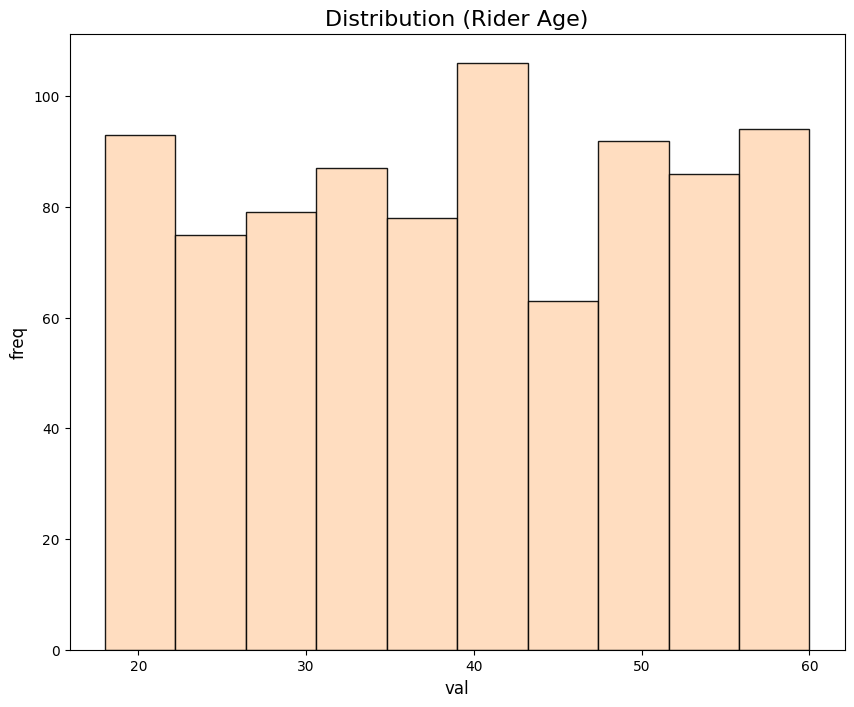

In [22]:
HISTOGRAM(df_bikes['Rider Age'],
          colour = 'peachpuff',
          title = 'Distribution (Rider Age)')

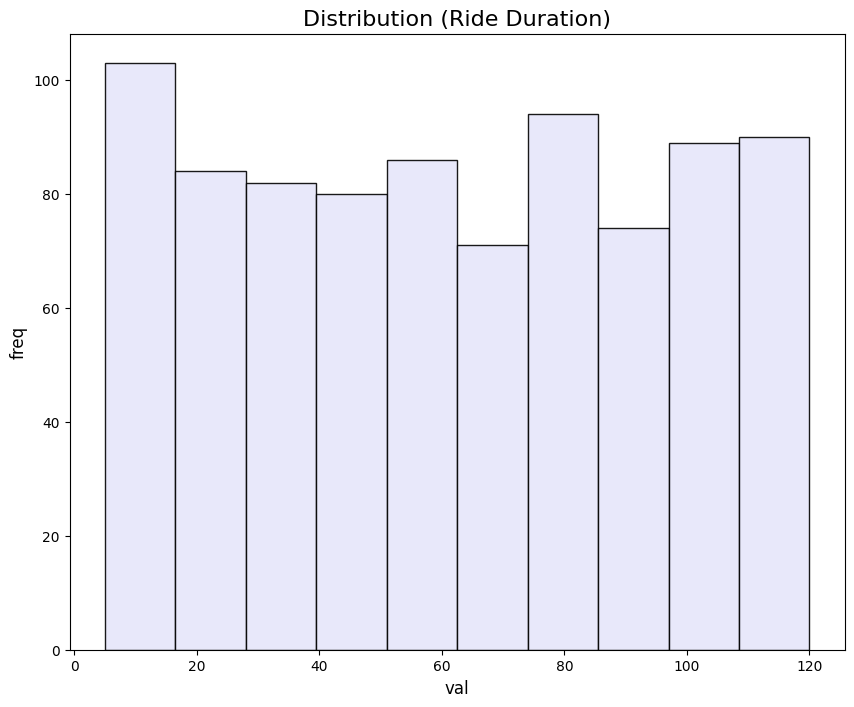

In [23]:
HISTOGRAM(df_bikes['Ride Duration (min)'],
          colour = 'lavender',
          title = 'Distribution (Ride Duration)')

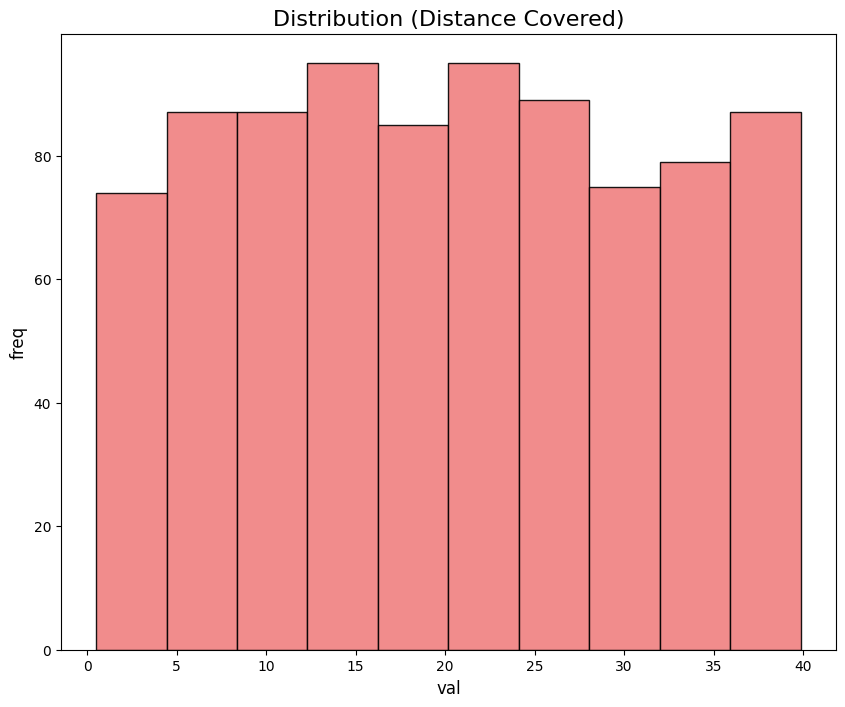

In [24]:
HISTOGRAM(df_bikes['Distance Covered (km)'],
          colour = 'lightcoral',
          title = 'Distribution (Distance Covered)')

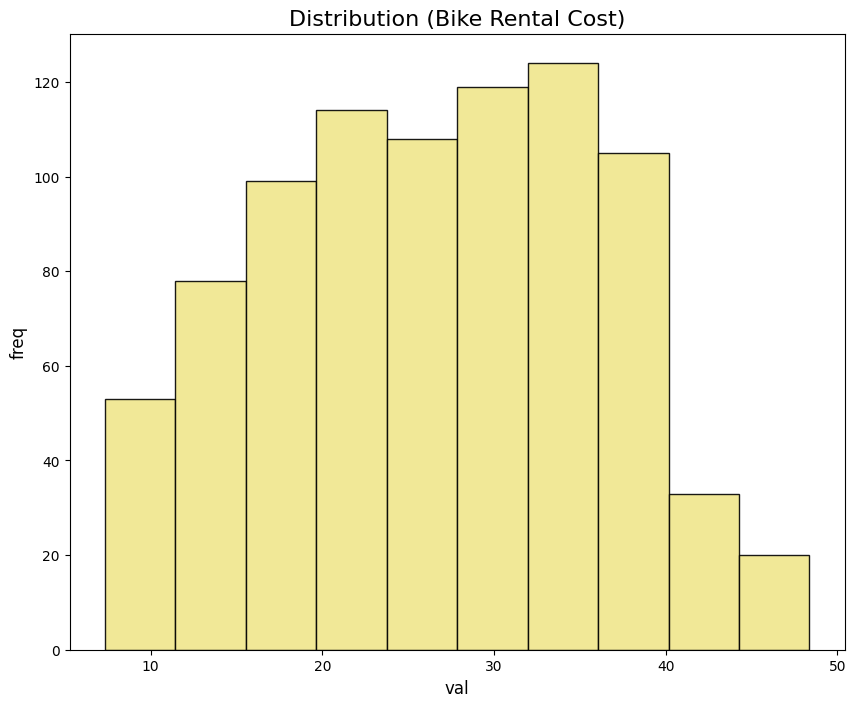

In [25]:
HISTOGRAM(df_bikes['Bike Rental Cost ($)'],
          colour = 'khaki',
          title = 'Distribution (Bike Rental Cost)')

### _**bar charts...**_

In [26]:
help(BAR_CHART)

Help on function BAR_CHART in module __main__:

BAR_CHART(dataset, target, colour='plasma', title='Distribution', x='Target', y='Count', fsize_title=16, fsize_label=12)
    .

    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_(title/label) : font size as an integer



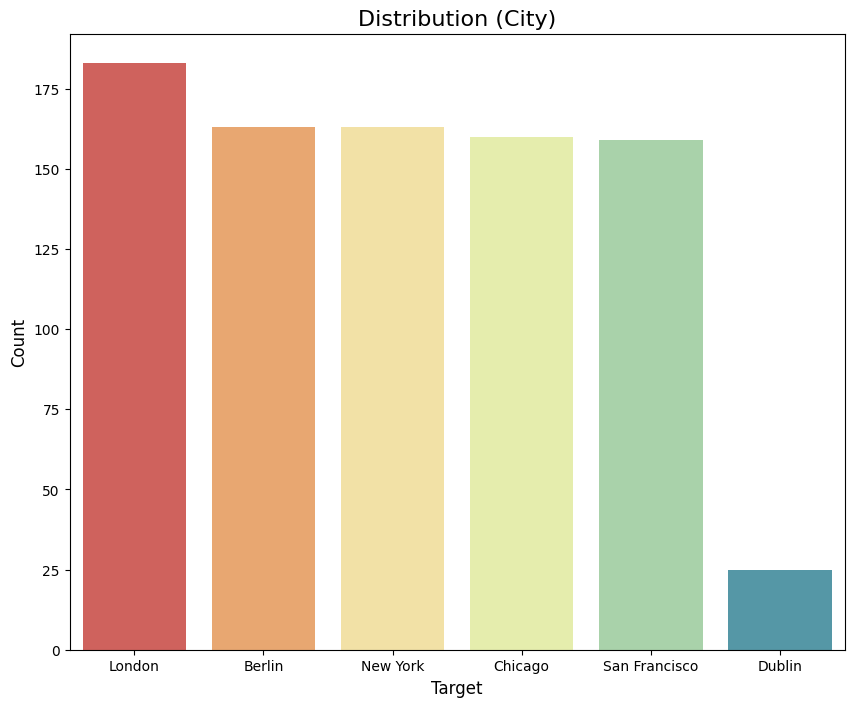

In [27]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['City'],
          colour = 'Spectral',
          title = 'Distribution (City)')

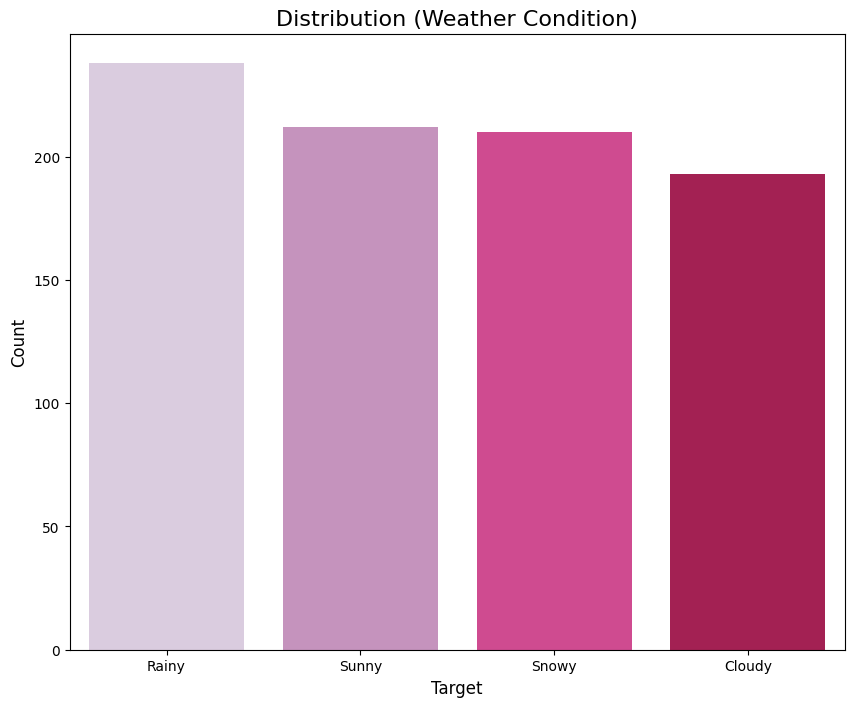

In [28]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Weather Condition'],
          colour = 'PuRd',
          title = 'Distribution (Weather Condition)')

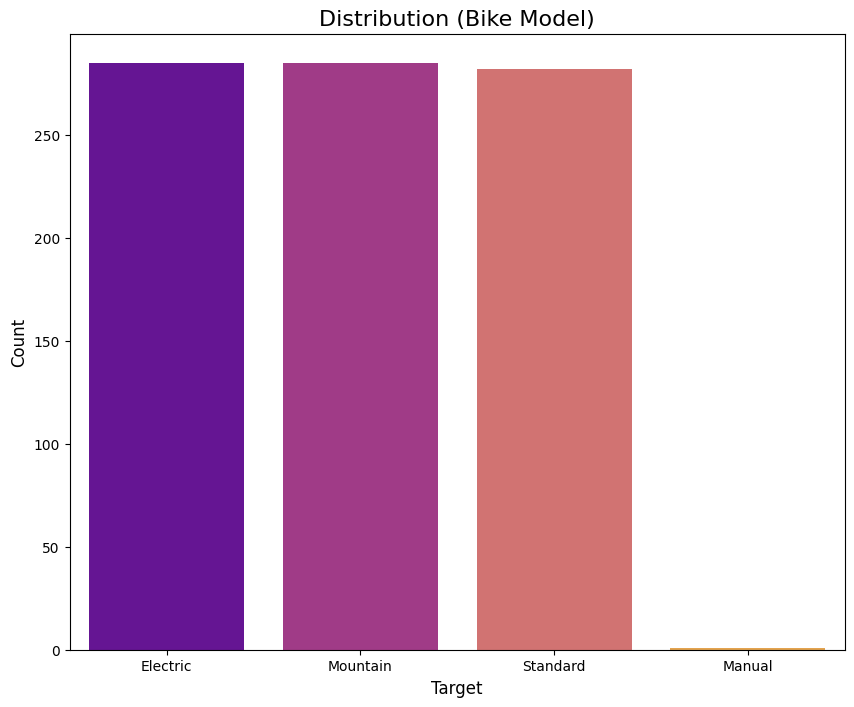

In [29]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Bike Model'],
          colour = 'plasma',
          title = 'Distribution (Bike Model)')

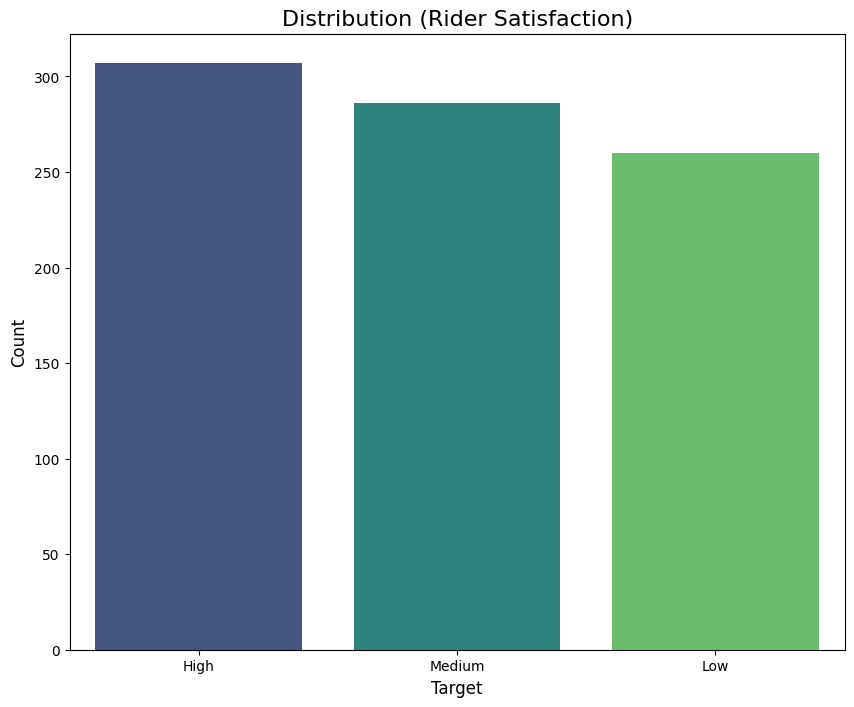

In [30]:
BAR_CHART(dataset = df_bikes,
          target = df_bikes['Rider Satisfaction'],
          colour = 'viridis',
          title = 'Distribution (Rider Satisfaction)')

### _**correlation matrix...**_

In [31]:
corr_matrix = visualisations.corr()

corr_matrix

,index,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,City_San Francisco,Bike Model_Electric,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard
index,1.000000,-0.005263,0.018162,-0.020133,-0.013952,0.026325,-0.029357,-0.008158,-0.012776,0.072586,-0.000496,0.001362,-0.011247,-0.009444,-0.020253,0.010089,0.000827
Weather Condition,-0.005263,1.000000,0.075874,0.017359,-0.032080,-0.064189,0.016371,-0.019359,0.019810,0.037020,-0.001754,-0.014001,-0.000365,0.013364,0.014686,0.011131,-0.025628
Rider Age,0.018162,0.075874,1.000000,-0.011542,0.012277,0.012706,0.012998,0.003192,0.010473,0.001373,0.011573,-0.024388,-0.001894,0.083720,-0.000730,-0.084261,0.000596
Ride Duration (min),-0.020133,0.017359,-0.011542,1.000000,-0.014858,-0.013296,0.913345,-0.002562,-0.030862,0.024980,0.011726,0.021704,-0.011569,0.037021,0.054389,0.023415,-0.064553
Distance Covered (km),-0.013952,-0.032080,0.012277,-0.014858,1.000000,-0.012607,-0.034977,-0.008926,-0.011652,0.010809,-0.034362,0.031400,0.020530,-0.027766,0.024940,0.004252,0.021762
Rider Satisfaction,0.026325,-0.064189,0.012706,-0.013296,-0.012607,1.000000,0.006817,-0.018260,-0.039931,0.030953,-0.038912,0.040392,0.045295,0.031461,0.039796,-0.020482,-0.013903
Bike Rental Cost ($),-0.029357,0.016371,0.012998,0.913345,-0.034977,0.006817,1.000000,0.002277,-0.009125,0.021664,0.011008,-0.001604,-0.012519,0.331499,0.043819,-0.000672,-0.334894
City_Berlin,-0.008158,-0.019359,0.003192,-0.002562,-0.008926,-0.018260,0.002277,1.000000,-0.233541,-0.084455,-0.254014,-0.236232,-0.232642,-0.009234,0.070487,0.022374,-0.018302
City_Chicago,-0.012776,0.019810,0.010473,-0.030862,-0.011652,-0.039931,-0.009125,-0.233541,1.000000,-0.083493,-0.251120,-0.233541,-0.229992,0.022549,-0.016462,0.016182,-0.037637
City_Dublin,0.072586,0.037020,0.001373,0.024980,0.010809,0.030953,0.021664,-0.084455,-0.083493,1.000000,-0.090812,-0.084455,-0.083171,-0.019935,-0.005953,0.009536,0.010860


<Axes: >

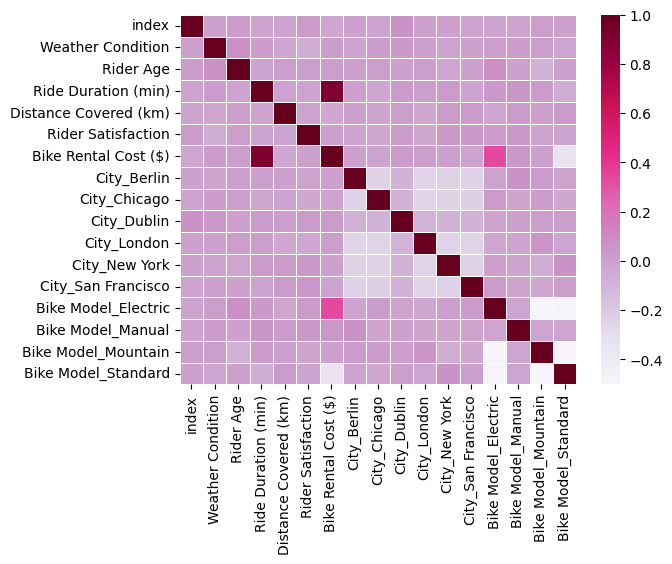

In [32]:
# which is then displayed using seaborn method {heatmap()};

sns.heatmap(corr_matrix,
            cmap = 'PuRd',
            fmt = '.2f',
            linewidths = 0.5)

### _**scatterplots...**_

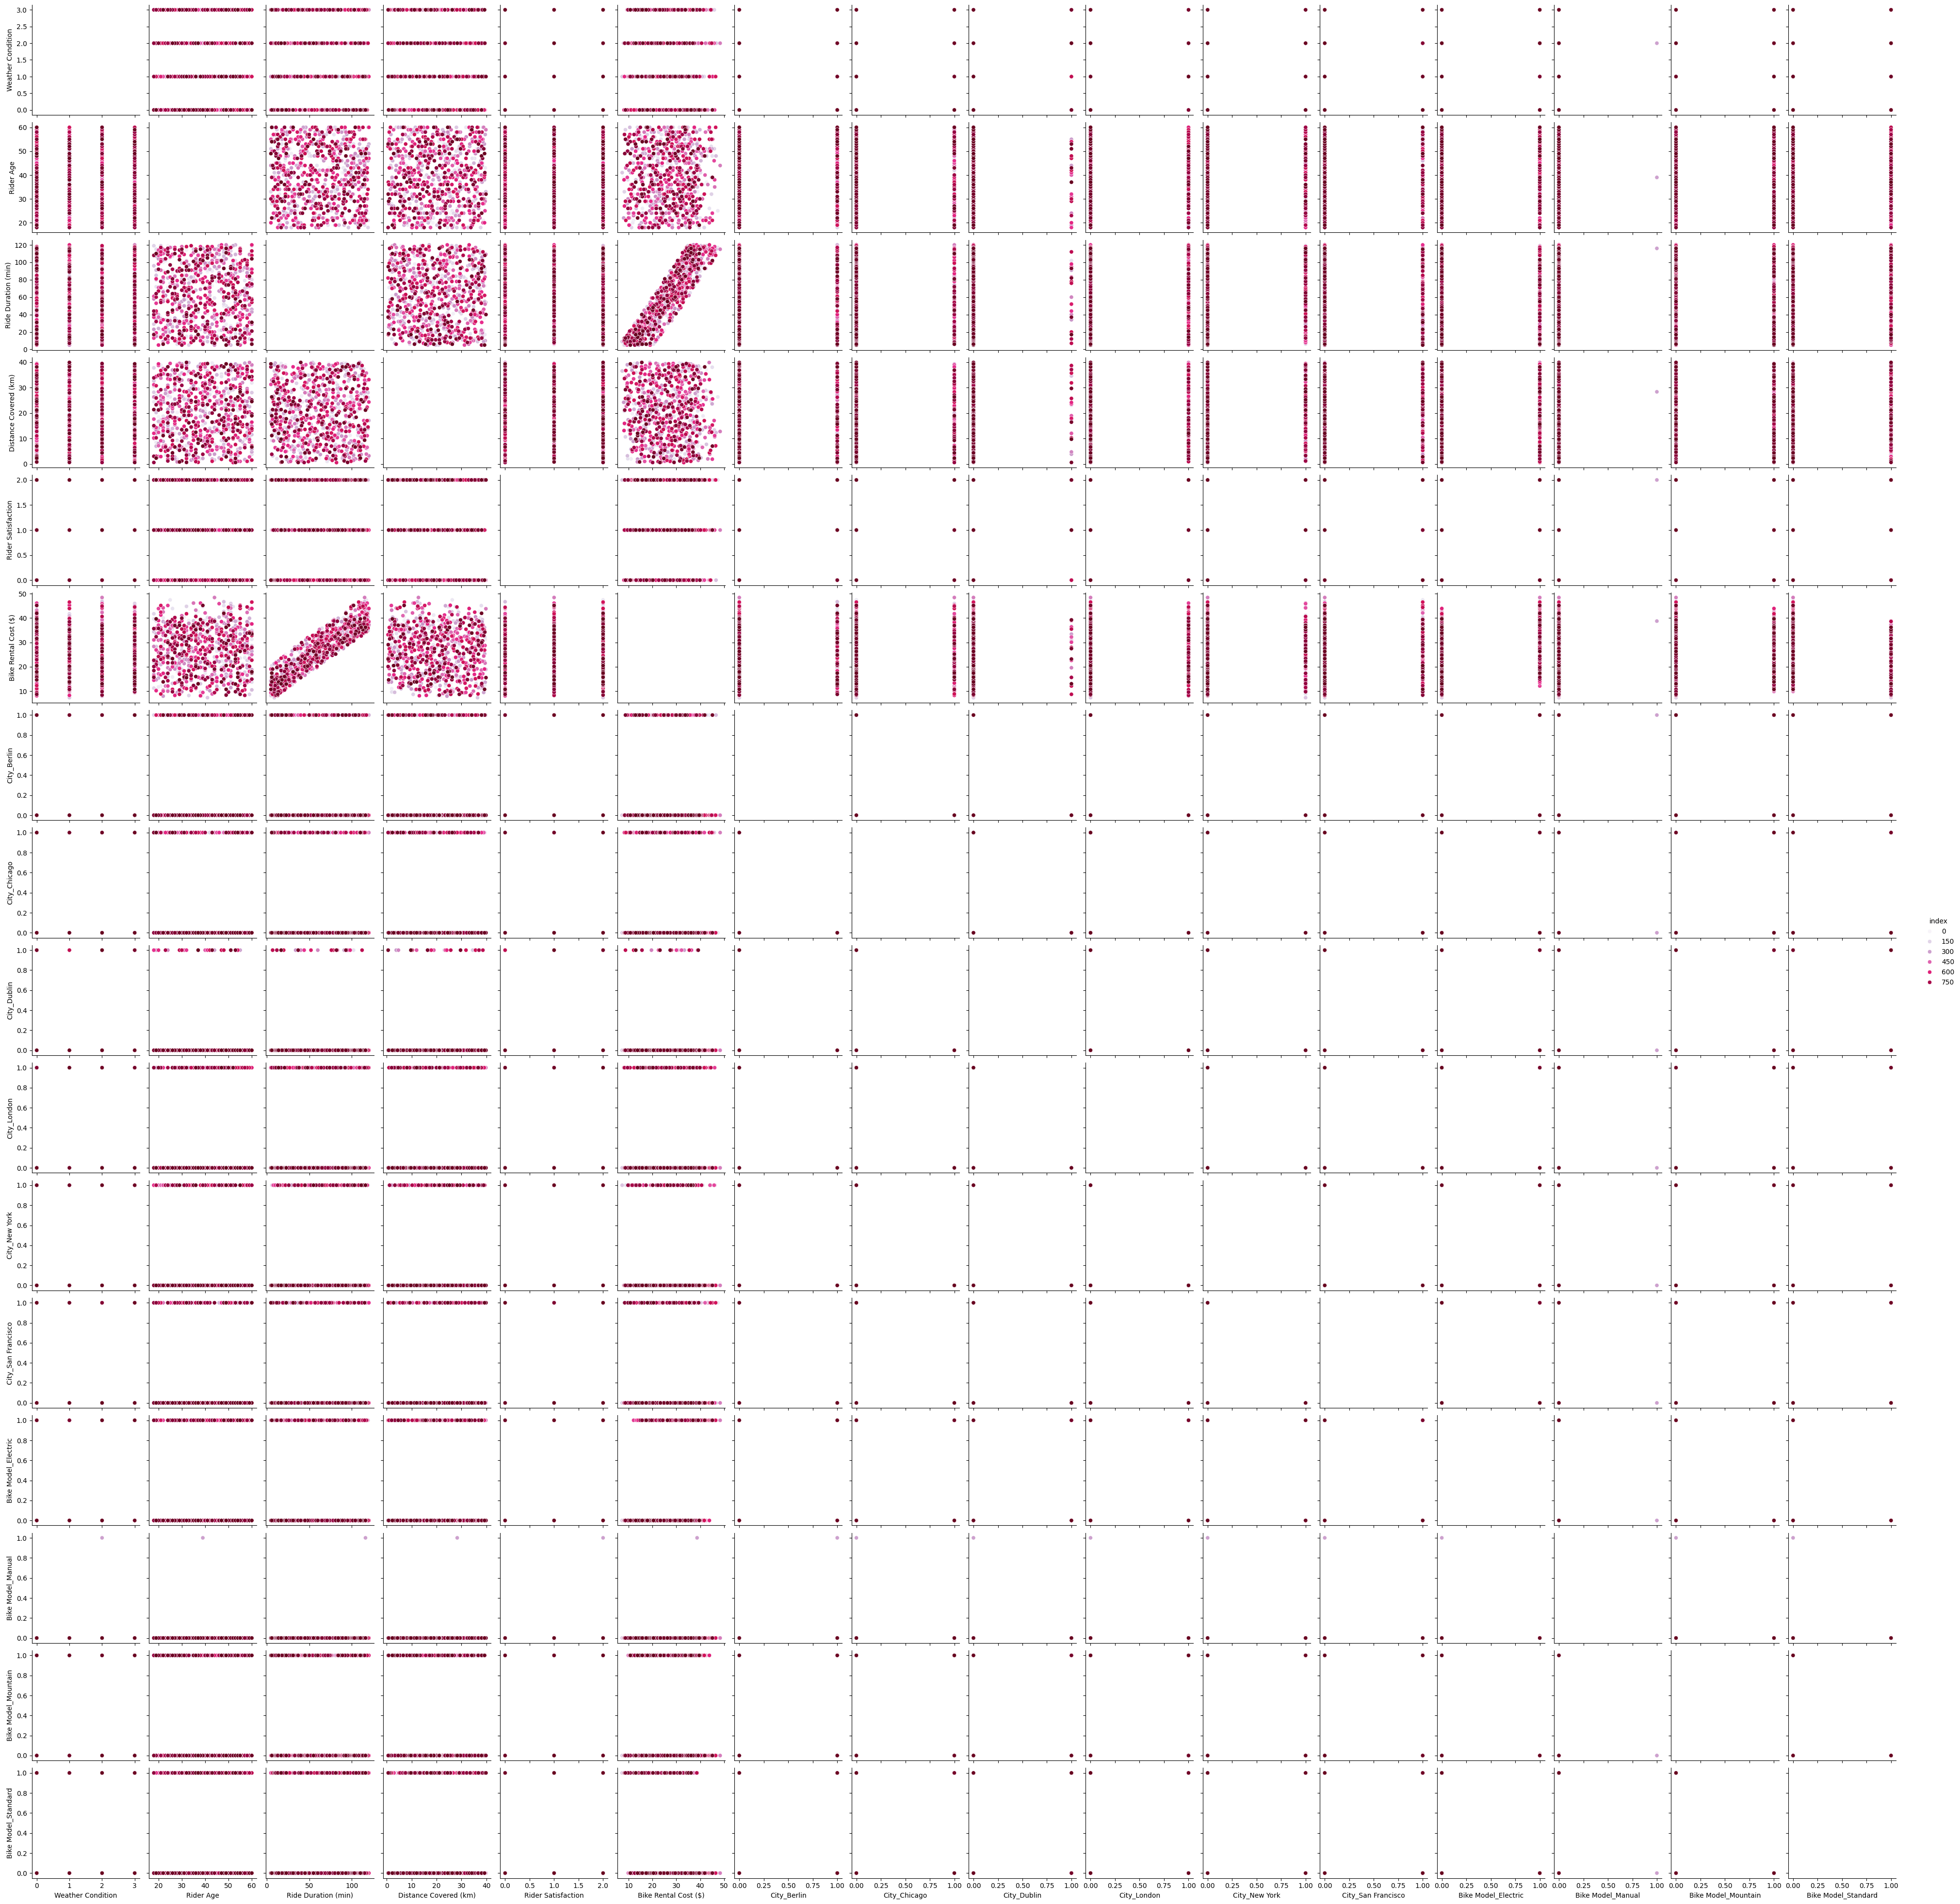

In [33]:
# a pairplot displaying correlated groupings is generated
# with variable {columns};

sns.pairplot(visualisations,
             hue = 'index',
             palette = 'PuRd')

plt.show()

# **TRAIN / TEST / SPLIT**

In [34]:
# features from parent DataFrame {df_bikes['Rider Satisfaction']} and 
# {df_bikes['Weather Condition']} are now label encoded;

df_bikes['Rider Satisfaction'] = df_bikes['Rider Satisfaction'].map(satisfaction_mapping)

df_bikes['Weather Condition'] = df_bikes['Weather Condition'].map(weather_mapping)

_class ['Manual'] present in feature ['Bike Model'] is rare with only 1 instance..._

In [35]:
print(df_bikes['Bike Model'].value_counts())

Bike Model
Electric    285
Mountain    285
Standard    282
Manual        1
Name: count, dtype: int64


_this will be handled by first seperating this class from the DataFrame..._

In [36]:
# the class to seperate is instantiated to {rare_class};

rare_class = 'Manual'

# pandas filtering is used to isolate this class and instantiate it 
# to {seperated_class}...

seperated_class = df_bikes[df_bikes['Bike Model'] == rare_class]

# ...and seperate it from {df_bikes} and re-instantiate this updated DataFrame
# to {df_bikes};

df_bikes = df_bikes[df_bikes['Bike Model'] != rare_class]

_this class will then be manually appended to both the train and test splits, and instances will be synthetically recreated using a SMOTE machine learning resampling strategy to handle the issue of extremely low cardinality..._

In [37]:
seperated_class['Bike Model'].value_counts()

Bike Model
Manual    1
Name: count, dtype: int64

In [38]:
df_bikes['Bike Model'].value_counts()

Bike Model
Electric    285
Mountain    285
Standard    282
Name: count, dtype: int64

### _**classification sets...**_

In [39]:
# target is sliced from {df_bikes} and instantiated
# to {class_target};

class_target = df_bikes.iloc[:, 6:7]

# feature set is created by dropping the target feature 
# from {df_bikes} and instantiating the remaining 
# features to {class_features};

class_features = df_bikes.drop(columns = ['Rider Satisfaction'])

class_target

,Rider Satisfaction
0,2
1,1
2,2
3,0
4,0
...,...
895,1
896,2
897,2
898,2


### _**regression sets...**_

In [40]:
# target is sliced from {df_bikes} and instantiated
# to {regress_target};

regress_target = df_bikes.iloc[:, 7:8]

                              # column {['Ride Duration (min)']} is
                              # removed due to its obvious and highly
                              # correlated relationship to the target,
                              # enabling the model to provide better
                              # insight towards less blatant predictors;

regress_features = df_bikes.drop(columns = ['Bike Rental Cost ($)', 
                                            'Ride Duration (min)'])

regress_target

,Bike Rental Cost ($)
0,22.63
1,7.87
2,39.40
3,37.63
4,13.12
...,...
895,26.30
896,13.78
897,20.47
898,39.62


### _**classification sets...**_

In [41]:
# create feature and test instances of the isolated rare class
# for classification sets;

cX_manual_class = seperated_class.drop(columns = ['Rider Satisfaction'])

cy_manual_class = seperated_class['Rider Satisfaction']

_**75 / 25**_

In [42]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {class_features} and {class_target} as input;

(class_X_train75,
 class_X_test25, 
 class_y_train75,
 class_y_test25) = train_test_split(class_features,
                                    class_target,
                                    random_state = 42,
                                    test_size = 0.25,
                                                    
                                    # ensure each unique class
                                    # from target is present
                                    # in the class target split set;
                                                                                                                        
                                    stratify = class_target)

# append the isolated class to each split;

class_X_train75 = pd.concat([class_X_train75,
                             cX_manual_class])

class_X_test25 = pd.concat([class_X_test25, 
                            cX_manual_class])

class_y_train75 = pd.concat([class_y_train75,
                             cy_manual_class])

class_y_test25 = pd.concat([class_y_test25,
                            cy_manual_class])

_**90 / 10**_

In [43]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 90 / 10 split ratio passing
# {class_features} and {class_target} as input;

(class_X_train90,
 class_X_test10, 
 class_y_train90,
 class_y_test10) = train_test_split(class_features,
                                    class_target,
                                    random_state = 42,
                                    test_size = 0.10,
                                                    
                                    # ensure each unique class is present
                                    # in the class target split set;
                                                                                                                        
                                    stratify = class_target)

# append the isolated class to each split;

class_X_train90 = pd.concat([class_X_train75,
                             cX_manual_class])

class_X_test10 = pd.concat([class_X_test25, 
                            cX_manual_class])

class_y_train90 = pd.concat([class_y_train75,
                             cy_manual_class])

class_y_test10 = pd.concat([class_y_test25,
                            cy_manual_class])

### _**regression sets...**_

In [44]:
# create feature and test instances of the isolated rare class for 
# regression sets;

rX_manual_class = seperated_class.drop(columns = ['Bike Rental Cost ($)',
                                                  'Ride Duration (min)'])

ry_manual_class = seperated_class['Bike Rental Cost ($)']

_**75 / 25**_

In [45]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {regress_features} and {regress_target} as input;

(regress_X_train75,
 regress_X_test25, 
 regress_y_train75,
 regress_y_test25) = train_test_split(regress_features,
                                      regress_target,
                                      random_state = 42,
                                      test_size = 0.25)
                                
                                      # stratification is not necessary for
                                      # regression split sets

# append the isolated class to each split;

regress_X_train75 = pd.concat([regress_X_train75,
                             rX_manual_class])

regress_X_test25 = pd.concat([regress_X_test25, 
                            rX_manual_class])

regress_y_train75 = pd.concat([regress_y_train75,
                             ry_manual_class])

regress_y_test25 = pd.concat([regress_y_test25,
                            ry_manual_class])

_**90 / 10**_

In [46]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {regress_features} and {regress_target} as input;

(regress_X_train90, 
 regress_X_test10,
 regress_y_train90, 
 regress_y_test10) = train_test_split(regress_features,
                                      regress_target,
                                      random_state = 42,
                                      test_size = 0.10)
                                
                                      # stratification is not necessary for
                                      # regression split sets

# append the isolated class to each split;

regress_X_train90 = pd.concat([regress_X_train90,
                             rX_manual_class])

regress_X_test10 = pd.concat([regress_X_test10, 
                            rX_manual_class])

regress_y_train90 = pd.concat([regress_y_train90,
                             ry_manual_class])

regress_y_test10 = pd.concat([regress_y_test10,
                            ry_manual_class])

# **TEST SET ENCODING**

#### _only train sets will be resampled. Resampling test sets would result in poor model evaluation. A properly trained ml model will be capable of generalising well to unseen data regardless of any class imbalances that may be present within a test set..._

In [47]:
help(ONEHOT_ENCODE)

Help on function ONEHOT_ENCODE in module __main__:

ONEHOT_ENCODE(dataset, target, datatype='bool', drop=True)
    .

    ONE-HOT ENCODES AN INPUT TARGET USING
    PANDAS [get_dummies()] METHOD, PARAMETER INPUT
    IS:


    dataset : pandas DataFrame

    target : column name(s) as a list of string value(s)

    datatype : 'bool' or 'int' as a string value

    drop : True or False boolean value

    RECCOMMENDED FOR ONEHOT ENCODING CATEGORICAL
    DATATYPES



### _**classification sets...**_

_**75 / 25**_

In [48]:
# features;

class_X_test25 = ONEHOT_ENCODE(dataset = class_X_test25,
                               target = ['City',  
                                         'Bike Model'], 
                               datatype = 'int',
                               drop = False)

_**90 / 10**_

In [49]:
# features;

class_X_test10 = ONEHOT_ENCODE(dataset = class_X_test10,
                               target = ['City', 
                                         'Bike Model'], 
                               datatype = 'int',
                               drop = False)

### **RENAMING COLUMNS TO IMPROVE INTERPRETABILITY**

**_75 / 25_**

In [50]:
class_X_test25 = class_X_test25.rename(columns = {'City_Berlin': 'Berlin',
                                                  'City_Chicago': 'Chicago',
                                                  'City_London': 'London',
                                                  'City_San Francisco': 'San Francisco',
                                                  'City_New York': 'New York',
                                                  'City_Dublin': 'Dublin',
                                                  'Bike Model_Electric': 'Electric',
                                                  'Bike Model_Manual': 'Manual',
                                                  'Bike Model_Mountain': 'Mountain',
                                                  'Bike Model_Standard': 'Standard'})

In [51]:
class_X_test25

,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric,Manual,Mountain,Standard
23,0,28.0,48.0,20.19,17.80,0,1,0,0,0,0,0,0,0,1
336,3,36.0,98.0,14.44,37.60,0,0,0,1,0,0,0,0,1,0
377,3,28.0,26.0,0.80,13.69,0,1,0,0,0,0,0,0,0,1
288,2,39.0,102.0,2.15,37.55,0,0,0,0,0,1,1,0,0,0
191,3,55.0,63.0,28.59,26.37,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2,38.0,69.0,10.59,30.45,0,0,0,1,0,0,0,0,1,0
533,1,57.0,10.0,6.37,13.37,0,0,0,0,1,0,1,0,0,0
562,1,29.0,50.0,24.53,19.34,0,0,0,0,1,0,0,0,0,1
109,0,55.0,37.0,23.20,23.58,0,0,0,0,0,1,1,0,0,0


**_90 / 10_**

In [52]:
class_X_test10 = class_X_test10.rename(columns = {'City_Berlin': 'Berlin',
                                                  'City_Chicago': 'Chicago',
                                                  'City_London': 'London',
                                                  'City_San Francisco': 'San Francisco',
                                                  'City_New York': 'New York',
                                                  'City_Dublin': 'Dublin',
                                                  'Bike Model_Electric': 'Electric',
                                                  'Bike Model_Manual': 'Manual',
                                                  'Bike Model_Mountain': 'Mountain',
                                                  'Bike Model_Standard': 'Standard'})

In [53]:
class_X_test10

,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Berlin,Chicago,Dublin,London,New York,San Francisco,Electric,Manual,Mountain,Standard
23,0,28.0,48.0,20.19,17.80,0,1,0,0,0,0,0,0,0,1
336,3,36.0,98.0,14.44,37.60,0,0,0,1,0,0,0,0,1,0
377,3,28.0,26.0,0.80,13.69,0,1,0,0,0,0,0,0,0,1
288,2,39.0,102.0,2.15,37.55,0,0,0,0,0,1,1,0,0,0
191,3,55.0,63.0,28.59,26.37,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1,57.0,10.0,6.37,13.37,0,0,0,0,1,0,1,0,0,0
562,1,29.0,50.0,24.53,19.34,0,0,0,0,1,0,0,0,0,1
109,0,55.0,37.0,23.20,23.58,0,0,0,0,0,1,1,0,0,0
297,2,39.0,116.0,28.32,38.71,1,0,0,0,0,0,0,1,0,0


### _**regression sets...**_

_**75 / 25**_

In [54]:
# features;

regress_X_test25 = ONEHOT_ENCODE(dataset = regress_X_test25,
                                 target = ['City', 
                                           'Bike Model'], 
                                 datatype = 'int',
                                 drop = False)

_**90 / 10**_

In [55]:
# features;

regress_X_test10 = ONEHOT_ENCODE(dataset = regress_X_test10,
                                 target = ['City', 
                                           'Bike Model'], 
                                 datatype = 'int',
                                 drop = False)

### **RENAMING COLUMNS TO IMPROVE INTERPRETABILITY**

**_75 / 25_**

In [56]:
regress_X_test25 = regress_X_test25.rename(columns = {'City_Berlin': 'Berlin',
                                                      'City_Chicago': 'Chicago',
                                                      'City_London': 'London',
                                                      'City_San Francisco': 'San Francisco',
                                                      'City_New York': 'New York',
                                                      'City_Dublin': 'Dublin',
                                                      'Bike Model_Electric': 'Electric',
                                                      'Bike Model_Manual': 'Manual',
                                                      'Bike Model_Mountain': 'Mountain',
                                                      'Bike Model_Standard': 'Standard'})

In [57]:
regress_X_test25

,Weather Condition,Rider Age,Distance Covered (km),Rider Satisfaction,Berlin,Chicago,Dublin,London,New York,San Francisco,Electric,Manual,Mountain,Standard
67,3,28.0,23.82,2,0,0,0,0,1,0,1,0,0,0
462,2,40.0,18.94,0,0,0,1,0,0,0,0,0,0,1
207,0,45.0,27.70,2,0,1,0,0,0,0,0,0,0,1
224,2,20.0,16.69,1,1,0,0,0,0,0,1,0,0,0
694,2,52.0,9.89,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,41.0,10.07,0,1,0,0,0,0,0,0,0,1,0
781,3,30.0,30.86,0,1,0,0,0,0,0,0,0,0,1
460,0,20.0,2.91,2,1,0,0,0,0,0,0,0,0,1
213,0,42.0,9.08,0,1,0,0,0,0,0,1,0,0,0


**_90 / 10_**

In [58]:
regress_X_test10 = regress_X_test10.rename(columns = {'City_Berlin': 'Berlin',
                                                      'City_Chicago': 'Chicago',
                                                      'City_London': 'London',
                                                      'City_San Francisco': 'San Francisco',
                                                      'City_New York': 'New York',
                                                      'City_Dublin': 'Dublin',
                                                      'Bike Model_Electric': 'Electric',
                                                      'Bike Model_Manual': 'Manual',
                                                      'Bike Model_Mountain': 'Mountain',
                                                      'Bike Model_Standard': 'Standard'})

In [59]:
regress_X_test10

,Weather Condition,Rider Age,Distance Covered (km),Rider Satisfaction,Berlin,Chicago,Dublin,London,New York,San Francisco,Electric,Manual,Mountain,Standard
67,3,28.0,23.82,2,0,0,0,0,1,0,1,0,0,0
462,2,40.0,18.94,0,0,0,1,0,0,0,0,0,0,1
207,0,45.0,27.70,2,0,1,0,0,0,0,0,0,0,1
224,2,20.0,16.69,1,1,0,0,0,0,0,1,0,0,0
694,2,52.0,9.89,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,28.0,18.00,0,0,1,0,0,0,0,1,0,0,0
699,0,50.0,21.17,1,0,0,0,0,1,0,1,0,0,0
731,3,39.0,30.71,1,0,0,0,0,1,0,1,0,0,0
371,2,33.0,25.07,0,0,0,0,1,0,0,0,0,0,1


# **CLASS IMBALANCE HANDLING**

#### _label encoding nominal features..._

In [60]:
# nominal categorical features will first be label
# encoded to enable resampling of unbalanced features, this is
# done as resampling one-hot encoded features is a far
# more complex task and is unnecessary as label encoded
# features can be one-hot encoded after resampling takes place;

                # London temporarily is assigned 0
                # for obvious reasons;

city_mapping = {'London': 0,
                'San Francisco': 1,
                'New York': 2,
                'Berlin': 3,
                'Chicago': 4,

                # Dublin is temporarily assigned
                # {5} as it is light years better than London;
                
                'Dublin' : 5}

model_mapping = {'Standard': 0,
                 'Manual': 1,
                 'Electric': 2,
                 'Mountain': 3}

#### _instantiating resampler objects..._

In [61]:
# various sampling strategies are used and evaluated by instantiating 
# {RandomUnderSampler(), RandomOverSampler(), and SMOTE()} sampler objects
# from the imblearn library;

rus = RandomUnderSampler(sampling_strategy = 'not minority')

ros = RandomOverSampler(sampling_strategy = 'not majority')

smote = SMOTE(sampling_strategy = 'auto', 
              random_state = 42)

- _**it was found through experimenting with each resampling methodology, that SMOTE resulted in the most reliable results**_
- _**the random undersampler object drastically reduced the cardinality of the overall dataset**_
- _**the random oversampler object increased overfitting due to its nature of simply copying instances rather than synthetically recreating new ones akin to the SMOTE strategy**_

### _**regression sets...**_

_**75 / 25**_

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

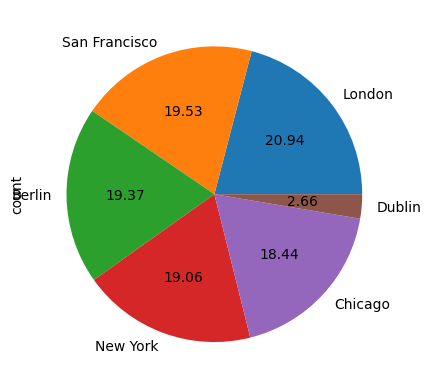

In [62]:
regress_X_train75['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

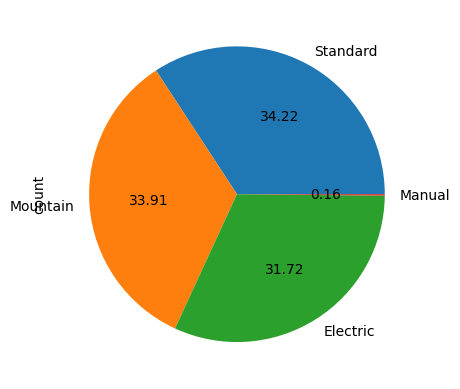

In [63]:
regress_X_train75['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

In [64]:
# imbalanced features are now label encoded;

regress_X_train75['City'] = regress_X_train75['City'].map(city_mapping)

regress_X_train75['Bike Model'] = regress_X_train75['Bike Model'].map(model_mapping)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

regress_resample75 = pd.concat([regress_X_train75, regress_y_train75],
                               axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(regress_resample75.drop(columns = ['City']), 
                          regress_resample75['City'])

# a new {resample} dataset is created by concatenation {X} and {y}...

regress_resample75 = pd.concat([X, y],
                               axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(regress_resample75.drop(columns = ['Bike Model']), 
                          regress_resample75['Bike Model'])

# a new {resample} dataset is created by concatenation {X} and {y}...

regress_resample75 = pd.concat([X, y],
                               axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

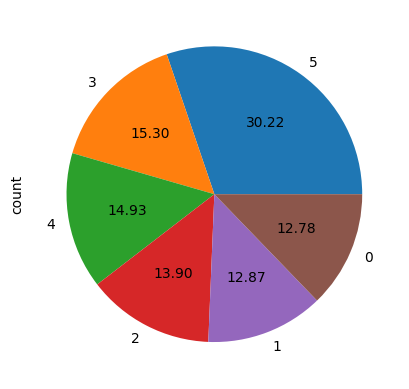

In [65]:
regress_resample75['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

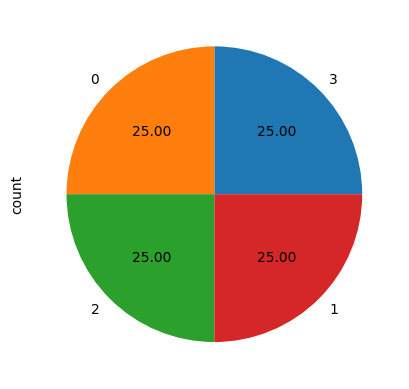

In [66]:
regress_resample75['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

**one-hot encode and rename features...**

In [67]:
regress_resample75 = ONEHOT_ENCODE(dataset = regress_resample75,
                                   target = ['City'],
                                   drop = False,
                                   datatype = 'int')

regress_resample75 = ONEHOT_ENCODE(dataset = regress_resample75,
                                   target = ['Bike Model'],
                                   drop = False,
                                   datatype = 'int')

regress_resample75 = regress_resample75.rename(columns = {'City_0': 'London',
                                                          'City_1': 'San Francisco',
                                                          'City_2': 'New York',
                                                          'City_3': 'Berlin',
                                                          'City_4': 'Chicago',
                                                          'City_5': 'Dublin',
                                                          'Bike Model_0': 'Standard',
                                                          'Bike Model_1': 'Manual',
                                                          'Bike Model_2': 'Electric',
                                                          'Bike Model_3': 'Mountain'})

regress_resample75

,Weather Condition,Rider Age,Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),London,San Francisco,New York,Berlin,Chicago,Dublin,Standard,Manual,Electric,Mountain
0,3,23.000000,6.920000,0,36.690000,0,0,1,0,0,0,0,0,0,1
1,3,47.000000,26.690000,0,28.590000,0,0,1,0,0,0,1,0,0,0
2,3,46.000000,23.580000,0,26.930000,0,0,1,0,0,0,1,0,0,0
3,0,48.000000,9.410000,2,14.340000,0,0,0,1,0,0,0,0,0,1
4,1,20.000000,7.150000,1,17.110000,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0,59.000000,8.804479,0,22.822084,0,0,1,0,0,0,0,0,0,1
1068,1,48.028939,38.232090,1,33.923569,0,0,1,0,0,0,0,0,0,1
1069,1,26.000000,20.611364,0,28.857898,0,1,0,0,0,0,0,0,0,1
1070,2,21.727961,6.540806,0,33.794610,0,0,1,0,0,0,0,0,0,1


In [68]:
# split resampled data into features and target;

regress_X_train75 = regress_resample75.drop(columns = ['Bike Rental Cost ($)'])
regress_y_train75 = regress_resample75['Bike Rental Cost ($)']

# ensure feature ordering is matched between train and test sets;

regress_X_test25 = regress_X_test25[regress_X_train75.columns]

**_90 / 10_**

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

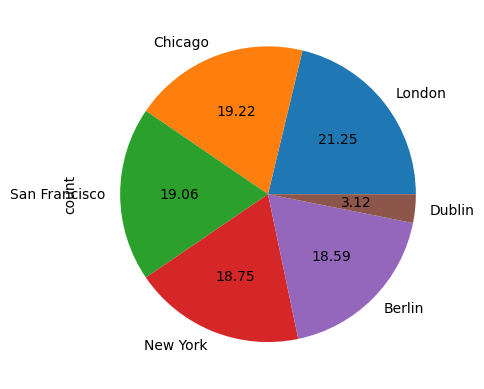

In [69]:
regress_X_train90['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

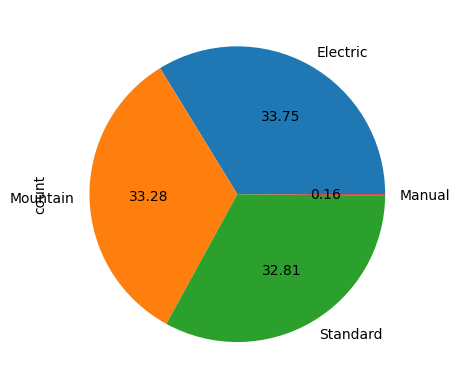

In [70]:
regress_X_train90['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

In [71]:
# imbalanced features are now label encoded;

regress_X_train90['City'] = regress_X_train90['City'].map(city_mapping)

regress_X_train90['Bike Model'] = regress_X_train90['Bike Model'].map(model_mapping)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

regress_resample90 = pd.concat([regress_X_train90, regress_y_train90],
                               axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(regress_resample90.drop(columns = ['City']), 
                          regress_resample90['City'])

# a new {resample} dataset is created by concatenation {X} and {y}...

regress_resample90 = pd.concat([X, y],
                               axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(regress_resample90.drop(columns = ['Bike Model']), 
                          regress_resample90['Bike Model'])

# a new {resample} dataset is created by concatenation {X} and {y}...

regress_resample90 = pd.concat([X, y],
                               axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

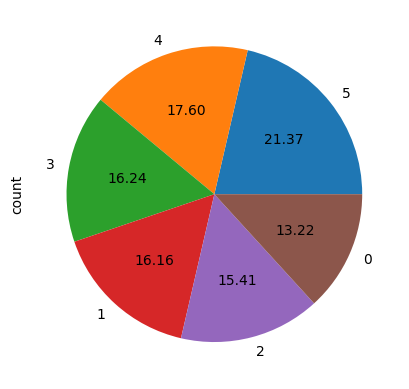

In [72]:
regress_resample90['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

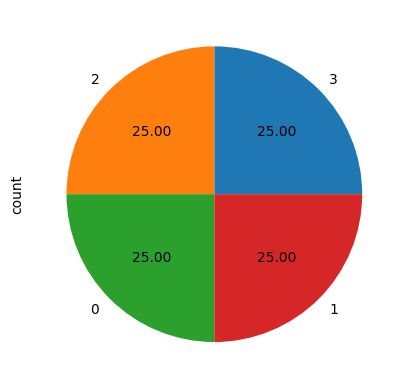

In [73]:
regress_resample90['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

**one-hot encode and rename features...**

In [74]:
regress_resample90 = ONEHOT_ENCODE(dataset = regress_resample90,
                                   target = ['City'],
                                   drop = False,
                                   datatype = 'int')

regress_resample90 = ONEHOT_ENCODE(dataset = regress_resample90,
                                   target = ['Bike Model'],
                                   drop = False,
                                   datatype = 'int')

regress_resample90 = regress_resample90.rename(columns = {'City_0': 'London',
                                                          'City_1': 'San Francisco',
                                                          'City_2': 'New York',
                                                          'City_3': 'Berlin',
                                                          'City_4': 'Chicago',
                                                          'City_5': 'Dublin',
                                                          'Bike Model_0': 'Standard',
                                                          'Bike Model_1': 'Manual',
                                                          'Bike Model_2': 'Electric',
                                                          'Bike Model_3': 'Mountain'})

regress_resample90

,Weather Condition,Rider Age,Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),London,San Francisco,New York,Berlin,Chicago,Dublin,Standard,Manual,Electric,Mountain
0,3,30.000000,20.510000,0,29.000000,0,1,0,0,0,0,0,0,0,1
1,3,43.000000,12.590000,2,28.630000,0,0,1,0,0,0,0,0,1,0
2,0,60.000000,16.390000,2,37.540000,1,0,0,0,0,0,0,0,0,1
3,0,39.000000,39.180000,0,35.100000,1,0,0,0,0,0,0,0,1,0
4,3,59.000000,14.750000,0,40.070000,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,0,34.769106,29.495415,1,35.498588,0,0,1,0,0,0,0,0,0,1
1320,2,35.241025,12.440000,0,18.183436,1,0,0,0,0,0,0,0,0,1
1321,2,19.940656,8.910995,0,16.374243,0,0,0,0,1,0,0,0,0,1
1322,2,47.170010,15.311197,0,33.463502,1,0,0,0,0,0,0,0,0,1


In [75]:
# split resampled data into features and target;

regress_X_train90 = regress_resample90.drop(columns = ['Bike Rental Cost ($)'])
regress_y_train90 = regress_resample90['Bike Rental Cost ($)']

# ensure feature ordering is matched between train and test sets;

regress_X_test10 = regress_X_test10[regress_X_train90.columns]

### _**classification sets...**_

_**75 / 25**_

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

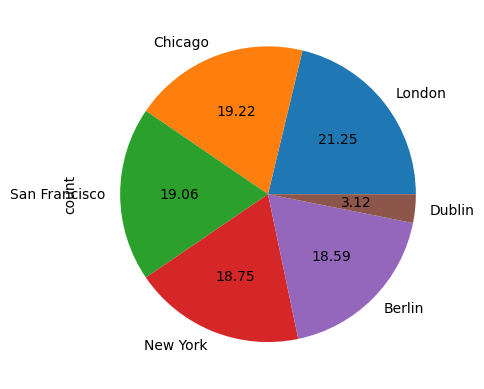

In [76]:
class_X_train75['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

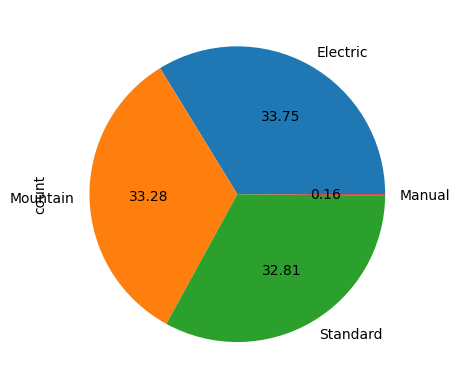

In [77]:
class_X_train75['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

In [78]:
# imbalanced features are now label encoded;

class_X_train75['City'] = class_X_train75['City'].map(city_mapping)

class_X_train75['Bike Model'] = class_X_train75['Bike Model'].map(model_mapping)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

class_resample75 = pd.concat([class_X_train75, class_y_train75],
                              axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(class_resample75.drop(columns = ['City']),
                          class_resample75['City'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample75 = pd.concat([X, y],
                             axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(class_resample75.drop(columns = ['Bike Model']), 
                          class_resample75['Bike Model'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample75 = pd.concat([X, y],
                             axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

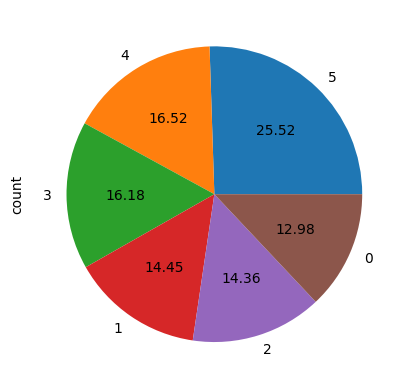

In [79]:
class_resample75['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

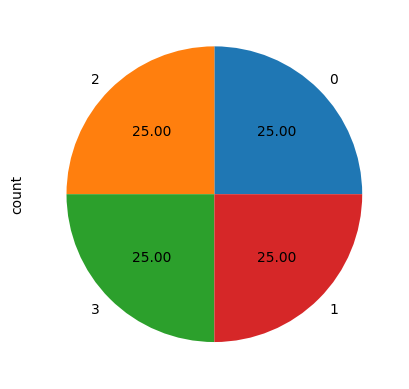

In [80]:
class_resample75['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

**one-hot encode and rename features...**

In [81]:
class_resample75 = ONEHOT_ENCODE(dataset = class_resample75,
                                 target = ['City'],
                                 drop = False,
                                 datatype = 'int')

class_resample75 = ONEHOT_ENCODE(dataset = class_resample75,
                                 target = ['Bike Model'],
                                 drop = False,
                                 datatype = 'int')

class_resample75 = class_resample75.rename(columns = {'City_0': 'London',
                                                      'City_1': 'San Francisco',
                                                      'City_2': 'New York',
                                                      'City_3': 'Berlin',
                                                      'City_4': 'Chicago',
                                                      'City_5': 'Dublin',
                                                      'Bike Model_0': 'Standard',
                                                      'Bike Model_1': 'Manual',
                                                      'Bike Model_2': 'Electric',
                                                      'Bike Model_3': 'Mountain'})

class_resample75

,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Rider Satisfaction,London,San Francisco,New York,Berlin,Chicago,Dublin,Standard,Manual,Electric,Mountain
0,2,32.000000,70.000000,2.120000,24.660000,0,0,1,0,0,0,0,1,0,0,0
1,1,59.000000,84.000000,11.870000,39.860000,1,0,1,0,0,0,0,0,0,1,0
2,0,23.000000,104.000000,6.670000,32.850000,1,0,0,1,0,0,0,1,0,0,0
3,1,34.000000,49.000000,7.590000,20.160000,0,0,1,0,0,0,0,1,0,0,0
4,2,52.000000,97.000000,33.300000,40.020000,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0,29.226400,23.078621,16.192911,18.127068,1,0,0,0,1,0,0,0,0,0,1
1152,2,47.689827,86.873449,15.448759,34.929975,0,0,1,0,0,0,0,0,0,0,1
1153,3,22.173097,40.608968,19.559208,20.406017,0,0,0,0,0,1,0,0,0,0,1
1154,0,55.885348,9.303343,39.532381,13.254545,0,0,0,1,0,0,0,0,0,0,1


In [82]:
# split resampled data into features and target;

class_X_train75 = class_resample75.drop(columns = ['Rider Satisfaction'])
class_y_train75 = class_resample75['Rider Satisfaction']

# ensure feature ordering is matched between train and test sets;

class_X_test25 = class_X_test25[class_X_train75.columns]

_**90 / 10**_

#### _distriution of unbalanced columns before resampling..._

<Axes: ylabel='count'>

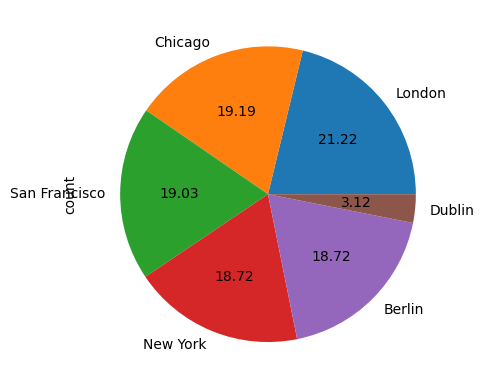

In [83]:
class_X_train90['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

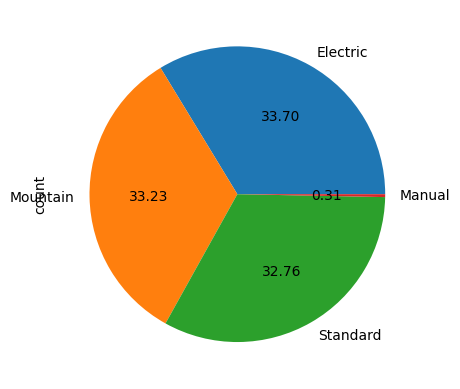

In [84]:
class_X_train90['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

In [85]:
# imbalanced features are now label encoded;

class_X_train90['City'] = class_X_train90['City'].map(city_mapping)

class_X_train90['Bike Model'] = class_X_train90['Bike Model'].map(model_mapping)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

class_resample90 = pd.concat([class_X_train90, class_y_train90],
                             axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(class_resample90.drop(columns = ['City']),
                          class_resample90['City'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample90 = pd.concat([X, y],
                             axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(class_resample90.drop(columns = ['Bike Model']), 
                          class_resample90['Bike Model'])

# a new {resample} dataset is created by concatenation {X} and {y}...

class_resample90 = pd.concat([X, y],
                             axis = 1)

#### _distriution of unbalanced columns after resampling..._

<Axes: ylabel='count'>

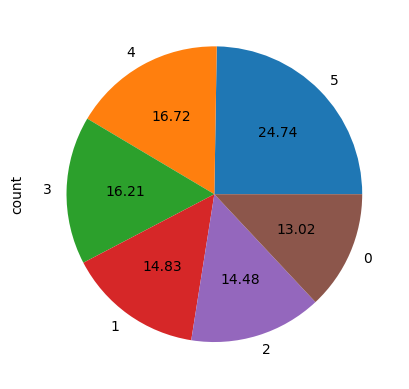

In [86]:
class_resample90['City'].value_counts().plot.pie(autopct = '%.2f')

<Axes: ylabel='count'>

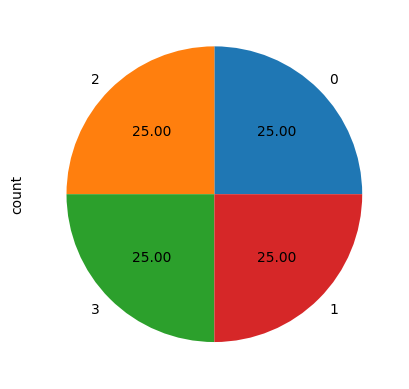

In [87]:
class_resample90['Bike Model'].value_counts().plot.pie(autopct = '%.2f')

**one-hot encode and rename features...**

In [88]:
class_resample90 = ONEHOT_ENCODE(dataset = class_resample90,
                                 target = ['City'],
                                 drop = False,
                                 datatype = 'int')

class_resample90 = ONEHOT_ENCODE(dataset = class_resample90,
                                 target = ['Bike Model'],
                                 drop = False,
                                 datatype = 'int')

class_resample90 = class_resample90.rename(columns = {'City_0': 'London',
                                                      'City_1': 'San Francisco',
                                                      'City_2': 'New York',
                                                      'City_3': 'Berlin',
                                                      'City_4': 'Chicago',
                                                      'City_5': 'Dublin',
                                                      'Bike Model_0': 'Standard',
                                                      'Bike Model_1': 'Manual',
                                                      'Bike Model_2': 'Electric',
                                                      'Bike Model_3': 'Mountain'})

class_resample90

,Weather Condition,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Rider Satisfaction,London,San Francisco,New York,Berlin,Chicago,Dublin,Standard,Manual,Electric,Mountain
0,2,32.000000,70.000000,2.120000,24.660000,0,0,1,0,0,0,0,1,0,0,0
1,1,59.000000,84.000000,11.870000,39.860000,1,0,1,0,0,0,0,0,0,1,0
2,0,23.000000,104.000000,6.670000,32.850000,1,0,0,1,0,0,0,1,0,0,0
3,1,34.000000,49.000000,7.590000,20.160000,0,0,1,0,0,0,0,1,0,0,0
4,2,52.000000,97.000000,33.300000,40.020000,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1,52.681271,7.300795,39.424243,12.089062,0,0,1,0,0,0,0,0,0,0,1
1156,2,21.428927,37.930019,13.946698,20.957030,0,0,0,0,0,1,0,0,0,0,1
1157,2,48.885707,39.771414,19.418563,22.336272,0,1,0,0,0,0,0,0,0,0,1
1158,1,21.796596,102.802269,5.237253,36.043679,1,1,0,0,0,0,0,0,0,0,1


In [89]:
# split resampled data into features and target;

class_X_train90 = class_resample90.drop(columns = ['Rider Satisfaction'])
class_y_train90 = class_resample90['Rider Satisfaction']

# ensure feature ordering is matched between train and test sets;

class_X_test10 = class_X_test10[class_X_train90.columns]

# **STANDARDISATION**

#### _instantiating Robust Scaler object..._

In [90]:
scaler = RobustScaler()

## **FITTING FEATURE SETS TO ROBUST SCALER OBJECT**

### _**regression sets...**_

**_75 / 25_**

In [91]:
regress_X_train75 = scaler.fit_transform(regress_X_train75)
regress_X_test25 = scaler.transform(regress_X_train75)

**_90 / 10_**

In [92]:
regress_X_test25

array([[ 0.        , -2.0305286 , -1.19772473, ...,  0.        ,
         0.        , 16.        ],
       [ 0.        , -1.9712157 , -1.13341243, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.97368707, -1.14352933, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.5       , -2.02311449, -1.15318638, ...,  0.        ,
         0.        , 16.        ],
       [-0.25      , -2.03367228, -1.19895826, ...,  0.        ,
         0.        , 16.        ],
       [-0.25      , -1.98924163, -1.18591661, ...,  0.        ,
         0.        , 16.        ]])

In [93]:
regress_X_train90 = scaler.fit_transform(regress_X_train90)
regress_X_test10 = scaler.transform(regress_X_test10)

### _**classification sets...**_

**_75 / 25_**

In [94]:
class_X_train75 = scaler.fit_transform(class_X_train75)
class_X_test25 = scaler.transform(class_X_test25)

**_90 / 10_**

In [95]:
class_X_train90 = scaler.fit_transform(class_X_train90)
class_X_test10 = scaler.transform(class_X_test10)

In [96]:
class_X_test10

array([[-1.        , -0.61848879, -0.37397466, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        , -0.21848879,  0.47596775, ...,  0.        ,
         0.        ,  4.        ],
       [ 2.        , -0.61848879, -0.74794932, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.        ,  0.73151121, -0.56096199, ...,  0.        ,
         4.        ,  0.        ],
       [ 1.        , -0.06848879,  0.78194701, ...,  4.        ,
         0.        ,  0.        ],
       [ 1.        , -0.06848879,  0.78194701, ...,  4.        ,
         0.        ,  0.        ]])

# **LOGISTIC REGRESSION FOR CUSTOMER CHURN**

#### _**model instantiation...**_

In [99]:
LogR = LogisticRegression(random_state = 42)

#### **_75 / 25_**

_fitting the model..._

In [101]:
LogR.fit(class_X_train75, 
         class_y_train75)

LogisticRegression()

_evaluating the model..._

In [107]:
# predict on the test set utilising the Logistic Regression model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LogR.predict(class_X_test25)

y_test = class_y_test25

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.27      0.34      0.30        65
           1       0.30      0.44      0.36        72
           2       0.37      0.13      0.19        77

    accuracy                           0.30       214
   macro avg       0.31      0.30      0.28       214
weighted avg       0.32      0.30      0.28       214



In [113]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,2,0
1,1,1
2,1,0
3,0,2
4,0,1
...,...,...
209,1,0
210,0,2
211,2,0
212,1,2


In [114]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



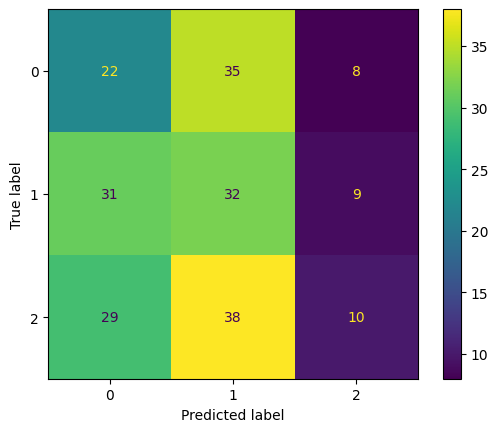

In [115]:
CONFUSION(df_results)

_hyperparameter optimisation..._

#### **_90 / 10_**

_fitting the model..._

In [116]:
LogR.fit(class_X_train90, 
         class_y_train90)

LogisticRegression()

_evaluating the model..._

In [117]:
# predict on the test set utilising the Logistic Regression model...

# convert the one-hot encoded vectors to single
# digits;

y_pred = LogR.predict(class_X_test25)

y_test = class_y_test25

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.30      0.35      0.33        65
           1       0.34      0.51      0.41        72
           2       0.43      0.17      0.24        77

    accuracy                           0.34       214
   macro avg       0.36      0.35      0.33       214
weighted avg       0.36      0.34      0.32       214



In [118]:
# ensure both {y_test} and {y_pred} are 1D arrays;

y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# store both arrays in dictionary {nn_results};

LogR_results = {'Actual Values': list(y_test),
                'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(LogR_results)

df_results

,Actual Values,Predicted Values
0,2,0
1,1,0
2,1,0
3,0,2
4,0,1
...,...,...
209,1,0
210,0,2
211,2,1
212,1,1


In [119]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



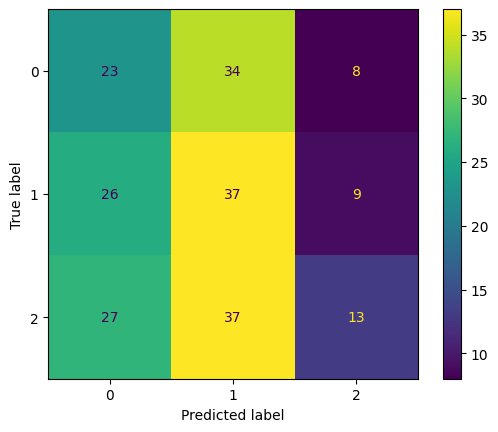

In [120]:
CONFUSION(df_results)

_hyperparameter optimisation..._

# **LINEAR REGRESSION FOR CUSTOMER EXPENSE**

#### _**model instantiation...**_

In [100]:
LinR = LinearRegression(random_state = 42)

#### _**75 / 25**_

_fitting the model..._

In [ ]:
LinR.fit()